In [377]:
# Definimos path de carpeta del proyecto
path_relativo =  r"../SET DE DATOS/UNIDO/CLIMA/"
destino_archivos =  "../SET DE DATOS/PROCESADOS/"
# Comprobamos los archivos disponibles
!ls "../SET DE DATOS/UNIDO/CLIMA/"

 estadisticas_normales_9120.zip
 estadisticas.txt
 POWER_Point_Daily_19850201_20241129_032d66S_065d07W_LST.csv
 Provinciales
'Series Historicas'


In [3]:
import os
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from scipy.stats import skew, kurtosis


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [178]:
df_power = pd.read_csv(path_relativo+"POWER_Point_Daily_19850201_20241129_032d66S_065d07W_LST.csv")

In [180]:
df_power['-BEGIN HEADER-'].head(20)

0       NASA/POWER Source Native Resolution Daily Data 
1     Dates (month/day/year): 02/01/1985 through 11/...
2     Location: latitude  -32.6623   longitude -65.0...
3     elevation from MERRA-2: Average for 0.5 x 0.62...
4     The value for missing source data that cannot ...
5                                        parameter(s): 
6     ALLSKY_SFC_UV_INDEX     CERES SYN1deg All Sky ...
7     ALLSKY_SFC_SW_DWN       CERES SYN1deg All Sky ...
8     ALLSKY_SFC_UVA          CERES SYN1deg All Sky ...
9     ALLSKY_SFC_UVB          CERES SYN1deg All Sky ...
10                                         -END HEADER-
11                                                 YEAR
12                                                 1985
13                                                 1985
14                                                 1985
15                                                 1985
16                                                 1985
17                                              

In [182]:
df_power = df_power.iloc[11:]

In [185]:
df_power.columns = df_power.iloc[0]
df_power = df_power[1:]
df_power = df_power.reset_index(drop=True)

In [187]:
df_power

11,YEAR,DOY,ALLSKY_SFC_UV_INDEX,ALLSKY_SFC_SW_DWN,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB
0,1985,32,-999.0,17.78,-999.0,-999.0
1,1985,33,-999.0,23.42,-999.0,-999.0
2,1985,34,-999.0,24.63,-999.0,-999.0
3,1985,35,-999.0,30.17,-999.0,-999.0
4,1985,36,-999.0,25.97,-999.0,-999.0
...,...,...,...,...,...,...
14542,2024,330,-999.0,17.8,-999.0,-999.0
14543,2024,331,-999.0,22.61,-999.0,-999.0
14544,2024,332,-999.0,12.83,-999.0,-999.0
14545,2024,333,-999.0,15.09,-999.0,-999.0


In [189]:
#df_power = df_power.drop(columns=df_power.columns[0],axis=1)

In [191]:
df_power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14547 entries, 0 to 14546
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   YEAR                 14547 non-null  object
 1   DOY                  14547 non-null  object
 2   ALLSKY_SFC_UV_INDEX  14547 non-null  object
 3   ALLSKY_SFC_SW_DWN    14547 non-null  object
 4   ALLSKY_SFC_UVA       14547 non-null  object
 5   ALLSKY_SFC_UVB       14547 non-null  object
dtypes: object(6)
memory usage: 682.0+ KB


In [193]:
# Los registros -999 son registros no validos segun la fuente de datos de la NASA por lo cual los consideramos como NA

print(df_power.shape[0])
for columna in df_power.columns:
    print(columna)
    print(df_power[df_power[columna]=="-999.0"][columna].count())
    df_power[columna] = df_power[columna].astype(float)
    

14547
YEAR
0
DOY
0
ALLSKY_SFC_UV_INDEX
5935
ALLSKY_SFC_SW_DWN
0
ALLSKY_SFC_UVA
5935
ALLSKY_SFC_UVB
5935


In [196]:
df_power.describe()

11,YEAR,DOY,ALLSKY_SFC_UV_INDEX,ALLSKY_SFC_SW_DWN,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB
count,14547.000000,14547.000000,14547.000000,14547.000000,14547.000000,14547.000000
mean,2004.499691,183.113219,-406.415038,19.305191,-406.827285,-407.560416
std,11.497394,105.093810,491.954124,7.940988,491.611253,491.002459
min,1985.000000,1.000000,-999.000000,1.170000,-999.000000,-999.000000
25%,1995.000000,92.000000,-999.000000,12.870000,-999.000000,-999.000000
50%,2004.000000,183.000000,0.680000,18.710000,0.700000,0.010000
75%,2014.000000,274.000000,2.200000,26.050000,1.420000,0.040000
max,2024.000000,366.000000,5.170000,36.110000,2.360000,0.080000


In [198]:



for columna in df_power.columns:
    condicion = df_power[columna]==-999
    df_power.loc[condicion,columna]  = pd.NA

In [200]:
df_power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14547 entries, 0 to 14546
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 14547 non-null  float64
 1   DOY                  14547 non-null  float64
 2   ALLSKY_SFC_UV_INDEX  8612 non-null   float64
 3   ALLSKY_SFC_SW_DWN    14547 non-null  float64
 4   ALLSKY_SFC_UVA       8612 non-null   float64
 5   ALLSKY_SFC_UVB       8612 non-null   float64
dtypes: float64(6)
memory usage: 682.0 KB


In [202]:
df_power

11,YEAR,DOY,ALLSKY_SFC_UV_INDEX,ALLSKY_SFC_SW_DWN,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB
0,1985.0,32.0,NaN,17.78,NaN,NaN
1,1985.0,33.0,NaN,23.42,NaN,NaN
2,1985.0,34.0,NaN,24.63,NaN,NaN
3,1985.0,35.0,NaN,30.17,NaN,NaN
4,1985.0,36.0,NaN,25.97,NaN,NaN
...,...,...,...,...,...,...
14542,2024.0,330.0,NaN,17.80,NaN,NaN
14543,2024.0,331.0,NaN,22.61,NaN,NaN
14544,2024.0,332.0,NaN,12.83,NaN,NaN
14545,2024.0,333.0,NaN,15.09,NaN,NaN


In [204]:
df_power.describe()

11,YEAR,DOY,ALLSKY_SFC_UV_INDEX,ALLSKY_SFC_SW_DWN,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB
count,14547.000000,14547.000000,8612.000000,14547.000000,8612.000000,8612.000000
mean,2004.499691,183.113219,1.967654,19.305191,1.271306,0.032934
std,11.497394,105.093810,1.148447,7.940988,0.518593,0.018881
min,1985.000000,1.000000,0.130000,1.170000,0.140000,0.000000
25%,1995.000000,92.000000,0.870000,12.870000,0.790000,0.010000
50%,2004.000000,183.000000,1.815000,18.710000,1.240000,0.030000
75%,2014.000000,274.000000,2.960000,26.050000,1.740000,0.050000
max,2024.000000,366.000000,5.170000,36.110000,2.360000,0.080000


In [209]:
df_power.groupby('YEAR').count()

11,DOY,ALLSKY_SFC_UV_INDEX,ALLSKY_SFC_SW_DWN,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB
YEAR,,,,,
1985.0,334,0,334,0,0
1986.0,365,0,365,0,0
1987.0,365,0,365,0,0
1988.0,366,0,366,0,0
1989.0,365,0,365,0,0
1990.0,365,0,365,0,0
1991.0,365,0,365,0,0
1992.0,366,0,366,0,0
1993.0,365,0,365,0,0


In [211]:
df_power = df_power[(df_power['YEAR']<2023) & (df_power['YEAR']>1985)]

In [213]:
df_power.groupby('YEAR').count()

11,DOY,ALLSKY_SFC_UV_INDEX,ALLSKY_SFC_SW_DWN,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB
YEAR,,,,,
1986.0,365,0,365,0,0
1987.0,365,0,365,0,0
1988.0,366,0,366,0,0
1989.0,365,0,365,0,0
1990.0,365,0,365,0,0
1991.0,365,0,365,0,0
1992.0,366,0,366,0,0
1993.0,365,0,365,0,0
1994.0,365,0,365,0,0


In [221]:
df_power[~df_power['ALLSKY_SFC_UV_INDEX'].isna()]['YEAR'].unique()

array([2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008., 2009.,
       2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017., 2018.,
       2019., 2020., 2021., 2022.])

In [223]:
df_power[~df_power['ALLSKY_SFC_UVA'].isna()]['YEAR'].unique()

array([2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008., 2009.,
       2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017., 2018.,
       2019., 2020., 2021., 2022.])

In [225]:
df_power[~df_power['ALLSKY_SFC_UVB'].isna()]['YEAR'].unique()



array([2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008., 2009.,
       2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017., 2018.,
       2019., 2020., 2021., 2022.])

In [ ]:
# VEmos que 3 de los 4 registros de radiación comenzaron a cargarse desde el 2001, vamos aver si es posible reconstruir 
# Datos anteriores por medio de los registros existentesdf_power_amplio



In [227]:

def correlaciones(df: pd.DataFrame,var_relacionadas:list):

    # Eliminamos registros con NA para analizar la correlacion
    df_largo_predictores = df[var_relacionadas].dropna()
    matriz_correlacion = df_largo_predictores.corr()

    # Configuración del estilo de seaborn
    sns.set(style="white")

    # Creación de la máscara para la mitad superior de la matriz
    mask = np.triu(np.ones_like(matriz_correlacion, dtype=bool))

    # Configuración de la figura matplotlib
    f, ax = plt.subplots(figsize=(9, 6))

    # Creación del mapa de calor con seaborn
    cmap = sns.diverging_palette(230, 20, as_cmap=True) # Paleta de colores divergente
    sns.heatmap(matriz_correlacion, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")

    # Título y ajustes adicionales
    plt.title('Matriz de Correlación de Predictores', fontsize=16)
    plt.xticks(rotation=45, ha='right') # Rotación de etiquetas del eje x
    plt.yticks(rotation=0) # Asegura que las etiquetas del eje y no estén rotadas
    plt.tight_layout() # Ajusta los parámetros de subtrama para un diseño compacto
    plt.show()



def ver_correlacion(matriz_correlacion):
    # Configuración del estilo de seaborn
    sns.set(style="white")

    # Creación de la máscara para la mitad superior de la matriz
    mask = np.triu(np.ones_like(matriz_correlacion, dtype=bool))

    # Configuración de la figura matplotlib
    f, ax = plt.subplots(figsize=(11, 9))

    # Creación del mapa de calor con seaborn
    cmap = sns.diverging_palette(230, 20, as_cmap=True) # Paleta de colores divergente
    sns.heatmap(matriz_correlacion, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")

    # Título y ajustes adicionales
    plt.title('Matriz de Correlación de Predictores', fontsize=16)
    plt.xticks(rotation=45, ha='right') # Rotación de etiquetas del eje x
    plt.yticks(rotation=0) # Asegura que las etiquetas del eje y no estén rotadas
    plt.tight_layout() # Ajusta los parámetros de subtrama para un diseño compacto
    plt.show()



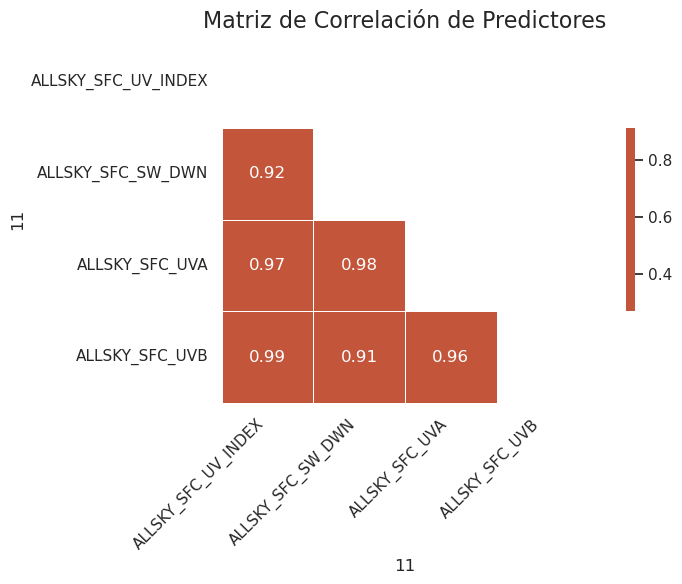

In [231]:
correlaciones(df_power,df_power.columns[2:])

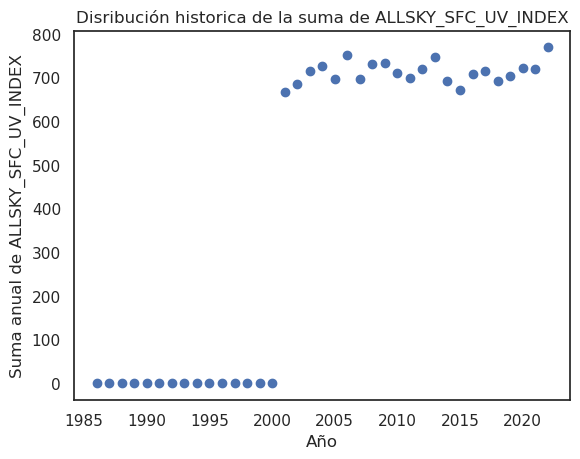

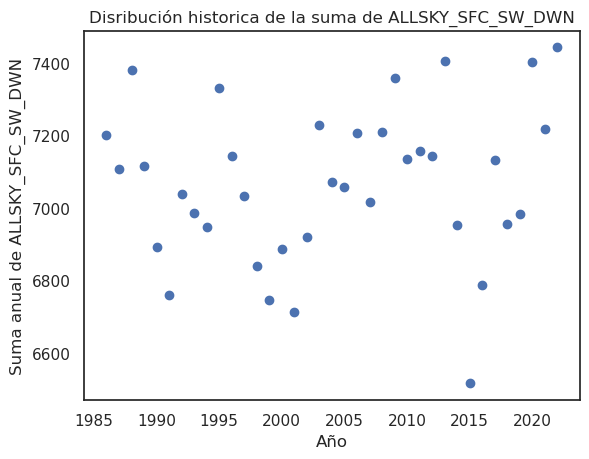

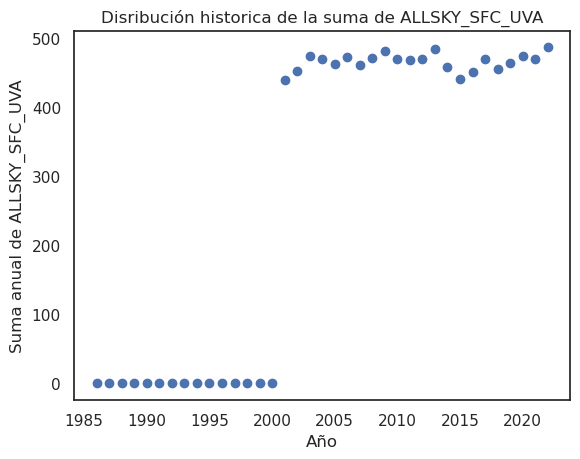

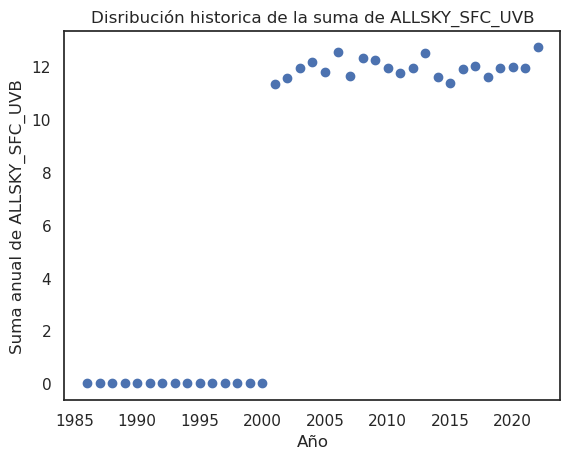

In [261]:

for variable in df_power.columns[2:]:
    plt.scatter(df_power.groupby('YEAR')[variable].sum().index, df_power.groupby('YEAR')[variable].sum().values)
    plt.xlabel("Año")
    plt.ylabel(f"Suma anual de {variable}")
    plt.title(f"Disribución historica de la suma de {variable}")
    plt.show()



In [263]:
def regresion_lineal_total(df: pd.DataFrame, variables_predictoras: list,variable_objetivo: str):
    """
    Funcion para obtener un regresor con sus metricas
    """

    # Filtrar registros sin valores nulos en variables predictoras y objetivo
    df_filtrado = df.dropna(subset=variables_predictoras + [variable_objetivo])

    # Separar variables predictoras (X) y variable objetivo (y)
    X = df_filtrado[variables_predictoras]
    y = df_filtrado[variable_objetivo]

    #División de los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    #Creación y entrenamiento del modelo de regresión lineal
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)

    #Predicciones y evaluación del modelo
    y_pred = modelo.predict(X_test)

    # Calcular métricas de evaluación
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Error Cuadrático Medio (MSE): {mse}")
    print(f"Coeficiente de Determinación (R2): {r2}")

    #Visualización de los resultados


    plt.scatter(y_test, y_pred)
    plt.xlabel("Valores reales")
    plt.ylabel("Valores predichos")
    plt.title("Valores reales vs. Valores predichos")
    plt.show()

    return modelo




Error Cuadrático Medio (MSE): 0.1975838341576597
Coeficiente de Determinación (R2): 0.8384904126747204


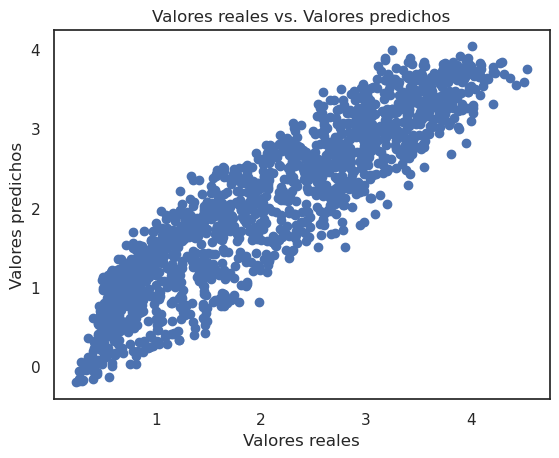

In [269]:
variables_predictoras = ['ALLSKY_SFC_SW_DWN']
variable_objetivo = 'ALLSKY_SFC_UV_INDEX'

model1 = regresion_lineal_total(df_power, variables_predictoras,variable_objetivo)

Error Cuadrático Medio (MSE): 0.009716123134334445
Coeficiente de Determinación (R2): 0.9629881271295384


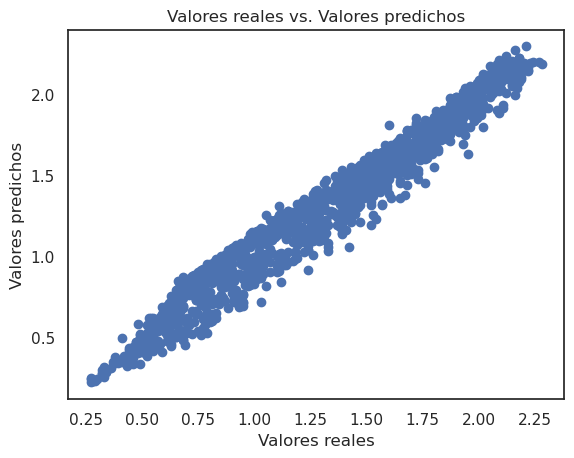

In [275]:
variables_predictoras = ['ALLSKY_SFC_SW_DWN']
variable_objetivo = 'ALLSKY_SFC_UVA'

model2 = regresion_lineal_total(df_power, variables_predictoras,variable_objetivo)


Error Cuadrático Medio (MSE): 5.8359960835433875e-05
Coeficiente de Determinación (R2): 0.8270371972185028


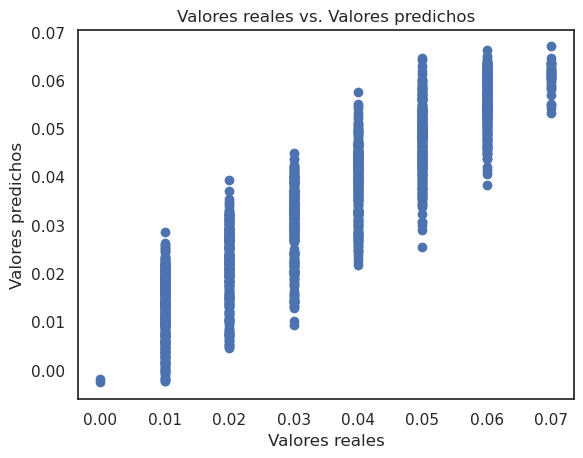

In [277]:
variables_predictoras = ['ALLSKY_SFC_SW_DWN']
variable_objetivo = 'ALLSKY_SFC_UVB'

model3 = regresion_lineal_total(df_power, variables_predictoras,variable_objetivo)


In [293]:
def asignar_regresion(variables_predictoras,variable_objetivo,df,modelo):
    # Asignamos a los valores null de UVA los valores del modelo de regresion para la variable predictora
    # Definir variables predictoras
    # Filtro de filas que cumplen ambas condiciones
    # Resguardamos el Df
    df = df.copy()
    
    filtro = df[variables_predictoras].notnull().all(axis=1) & df[variable_objetivo].isnull()
    
    # Seleccionar las filas y variables predictoras para la predicción
    df_prediccion = df.loc[filtro, variables_predictoras]
    
    # Realizar la predicción
    predicciones = modelo.predict(df_prediccion)
    
    # Asignar las predicciones a los valores nulos en el DataFrame original
    df.loc[filtro, variable_objetivo] = predicciones
    return df

In [295]:
variables_predictoras = ['ALLSKY_SFC_SW_DWN']
variable_objetivo = 'ALLSKY_SFC_UVA'


df_power = asignar_regresion(variables_predictoras,variable_objetivo,df_power,model2)

In [297]:
df_power.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13514 entries, 334 to 13847
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 13514 non-null  float64
 1   DOY                  13514 non-null  float64
 2   ALLSKY_SFC_UV_INDEX  8035 non-null   float64
 3   ALLSKY_SFC_SW_DWN    13514 non-null  float64
 4   ALLSKY_SFC_UVA       13514 non-null  float64
 5   ALLSKY_SFC_UVB       8035 non-null   float64
dtypes: float64(6)
memory usage: 739.0 KB


Error Cuadrático Medio (MSE): 0.04932052978798191
Coeficiente de Determinación (R2): 0.9596842603713979


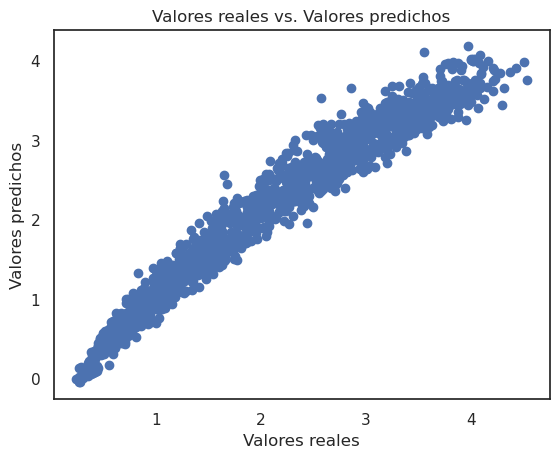

In [299]:
variables_predictoras = ['ALLSKY_SFC_SW_DWN','ALLSKY_SFC_UVA']
variable_objetivo = 'ALLSKY_SFC_UV_INDEX'

model1 = regresion_lineal_total(df_power, variables_predictoras,variable_objetivo)

Error Cuadrático Medio (MSE): 1.7751757639454033e-05
Coeficiente de Determinación (R2): 0.9473886940350104


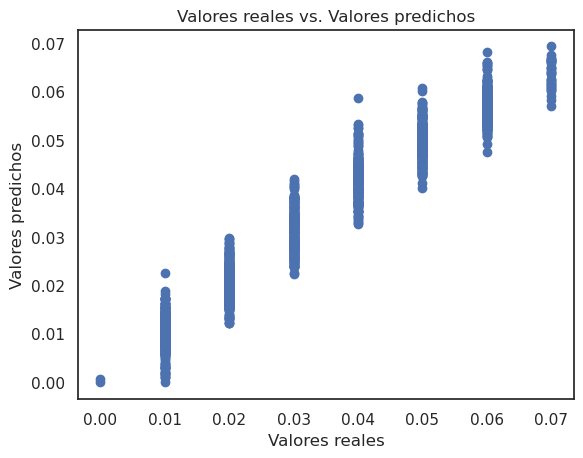

In [301]:
variables_predictoras = ['ALLSKY_SFC_SW_DWN','ALLSKY_SFC_UVA']
variable_objetivo = 'ALLSKY_SFC_UVB'

model2 = regresion_lineal_total(df_power, variables_predictoras,variable_objetivo)

In [303]:
# Avanzamos con el model2 dado lo bajo del MSE

variables_predictoras = ['ALLSKY_SFC_SW_DWN','ALLSKY_SFC_UVA']
variable_objetivo = 'ALLSKY_SFC_UVB'


df_power = asignar_regresion(variables_predictoras,variable_objetivo,df_power,model2)

In [305]:
df_power.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13514 entries, 334 to 13847
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 13514 non-null  float64
 1   DOY                  13514 non-null  float64
 2   ALLSKY_SFC_UV_INDEX  8035 non-null   float64
 3   ALLSKY_SFC_SW_DWN    13514 non-null  float64
 4   ALLSKY_SFC_UVA       13514 non-null  float64
 5   ALLSKY_SFC_UVB       13514 non-null  float64
dtypes: float64(6)
memory usage: 739.0 KB


Error Cuadrático Medio (MSE): 0.02330409397820924
Coeficiente de Determinación (R2): 0.98095069559989


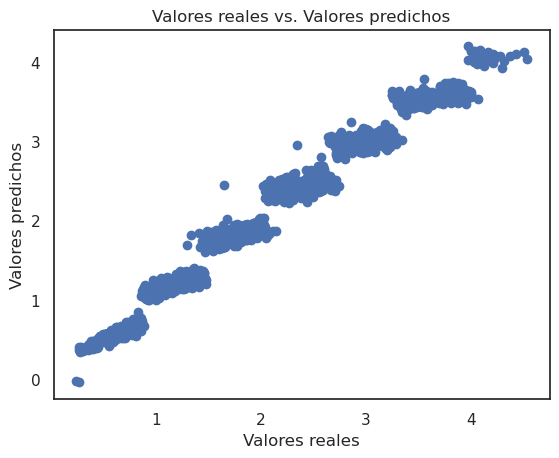

In [307]:
variables_predictoras = ['ALLSKY_SFC_SW_DWN','ALLSKY_SFC_UVA','ALLSKY_SFC_UVB']
variable_objetivo = 'ALLSKY_SFC_UV_INDEX'

model1 = regresion_lineal_total(df_power, variables_predictoras,variable_objetivo)

In [309]:

df_power = asignar_regresion(variables_predictoras,variable_objetivo,df_power,model1)
df_power.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13514 entries, 334 to 13847
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 13514 non-null  float64
 1   DOY                  13514 non-null  float64
 2   ALLSKY_SFC_UV_INDEX  13514 non-null  float64
 3   ALLSKY_SFC_SW_DWN    13514 non-null  float64
 4   ALLSKY_SFC_UVA       13514 non-null  float64
 5   ALLSKY_SFC_UVB       13514 non-null  float64
dtypes: float64(6)
memory usage: 739.0 KB


In [311]:
df_power.describe()

11,YEAR,DOY,ALLSKY_SFC_UV_INDEX,ALLSKY_SFC_SW_DWN,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB
count,13514.000000,13514.000000,13514.000000,13514.000000,13514.000000,13514.000000
mean,2004.000000,183.121874,1.939589,19.346067,1.269003,0.032564
std,10.677245,105.440585,1.075867,7.943635,0.506000,0.017740
min,1986.000000,1.000000,-0.401804,1.170000,0.122510,-0.005848
25%,1995.000000,92.000000,0.971608,12.900000,0.822889,0.018832
50%,2004.000000,183.000000,1.821142,18.775000,1.238957,0.030000
75%,2013.000000,274.000000,2.860000,26.060000,1.710000,0.050000
max,2022.000000,366.000000,4.690000,36.110000,2.360000,0.080000


In [317]:
df_power.loc[(df_power['ALLSKY_SFC_UV_INDEX']<0),'ALLSKY_SFC_UV_INDEX'] = 0
df_power.describe()

11,YEAR,DOY,ALLSKY_SFC_UV_INDEX,ALLSKY_SFC_SW_DWN,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB
count,13514.000000,13514.000000,13514.000000,13514.000000,13514.000000,13514.000000
mean,2004.000000,183.121874,1.939958,19.346067,1.269003,0.032564
std,10.677245,105.440585,1.075166,7.943635,0.506000,0.017740
min,1986.000000,1.000000,0.000000,1.170000,0.122510,-0.005848
25%,1995.000000,92.000000,0.971608,12.900000,0.822889,0.018832
50%,2004.000000,183.000000,1.821142,18.775000,1.238957,0.030000
75%,2013.000000,274.000000,2.860000,26.060000,1.710000,0.050000
max,2022.000000,366.000000,4.690000,36.110000,2.360000,0.080000


In [319]:
df_power.loc[(df_power['ALLSKY_SFC_UVB']<0),'ALLSKY_SFC_UVB'] = 0
df_power.describe()

11,YEAR,DOY,ALLSKY_SFC_UV_INDEX,ALLSKY_SFC_SW_DWN,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB
count,13514.000000,13514.000000,13514.000000,13514.000000,13514.000000,13514.000000
mean,2004.000000,183.121874,1.939958,19.346067,1.269003,0.032568
std,10.677245,105.440585,1.075166,7.943635,0.506000,0.017732
min,1986.000000,1.000000,0.000000,1.170000,0.122510,0.000000
25%,1995.000000,92.000000,0.971608,12.900000,0.822889,0.018832
50%,2004.000000,183.000000,1.821142,18.775000,1.238957,0.030000
75%,2013.000000,274.000000,2.860000,26.060000,1.710000,0.050000
max,2022.000000,366.000000,4.690000,36.110000,2.360000,0.080000


In [357]:
df_power.info()


<class 'pandas.core.frame.DataFrame'>
Index: 13514 entries, 334 to 13847
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 13514 non-null  float64
 1   DOY                  13514 non-null  float64
 2   ALLSKY_SFC_UV_INDEX  13514 non-null  float64
 3   ALLSKY_SFC_SW_DWN    13514 non-null  float64
 4   ALLSKY_SFC_UVA       13514 non-null  float64
 5   ALLSKY_SFC_UVB       13514 non-null  float64
dtypes: float64(6)
memory usage: 739.0 KB


In [321]:
# definimos ahora nuevas variables en funcion de las anteriores

def resumen_mensual_todas_variables(df, lista_variables):
    #df['MES'] = df['Fecha'].dt.month
    #df['YEAR'] = df['Fecha'].dt.year

    resumenes = []

    for variable in lista_variables:
        # Agrupamos por AÑO
        agrupado = df.groupby('YEAR')

        
        def contar_outliers(x):
            q1 = np.percentile(x, 25)
            q3 = np.percentile(x, 75)
            iqr = q3 - q1
            lower = q1 - 1.5 * iqr
            upper = q3 + 1.5 * iqr
            return ((x < lower) | (x > upper)).sum()

        funciones = {
            f'{variable}_mean': (variable, 'mean'),
            f'{variable}_sum': (variable, 'sum'),
            f'{variable}_min': (variable, 'min'),
            f'{variable}_max': (variable, 'max'),
            f'{variable}_std': (variable, 'std'),
            f'{variable}_median': (variable, 'median'),
            f'{variable}_skew': (variable, lambda x: skew(x.dropna())),
            f'{variable}_kurtosis': (variable, lambda x: kurtosis(x.dropna())),
            f'{variable}_outliers': (variable, contar_outliers)
        }

        
        resumen_variable = agrupado.agg(**funciones).reset_index()
        resumenes.append(resumen_variable)

    # Unimos todos los resúmenes en un solo DataFrame
    df_resumen = resumenes[0]
    for res in resumenes[1:]:
        df_resumen = pd.merge(df_resumen, res, on=['YEAR'], how='outer')

    return df_resumen

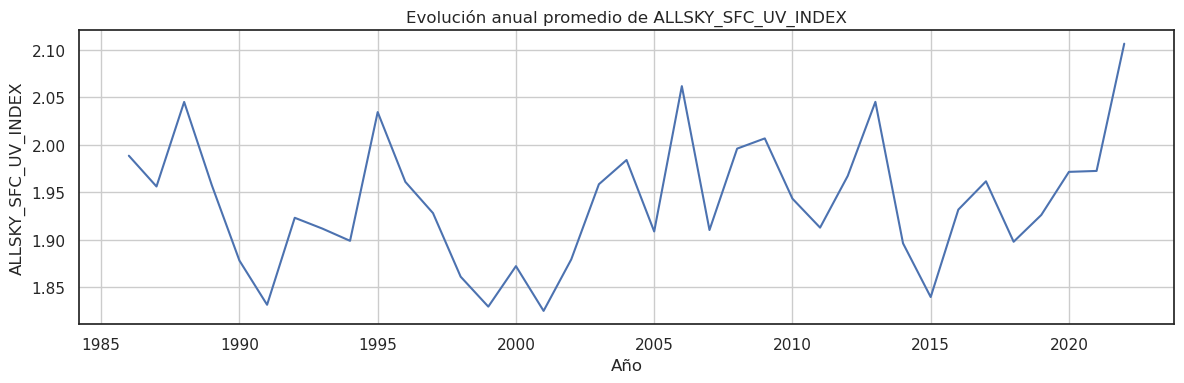

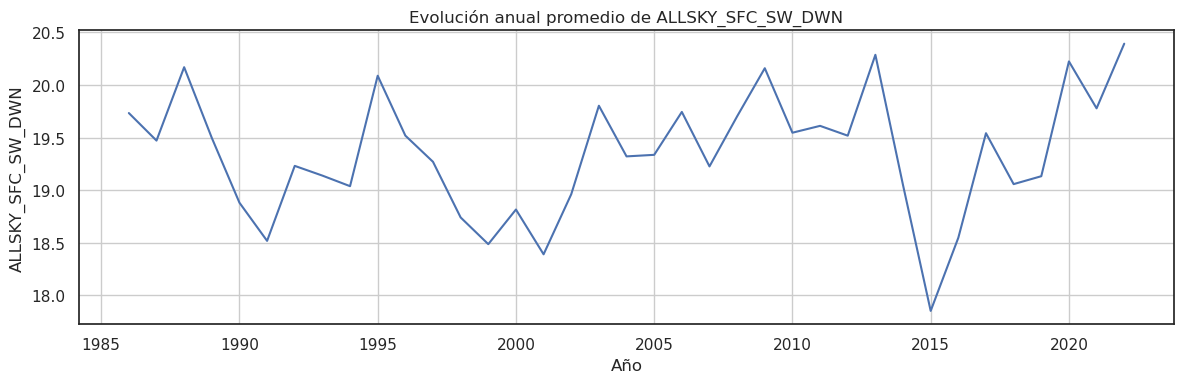

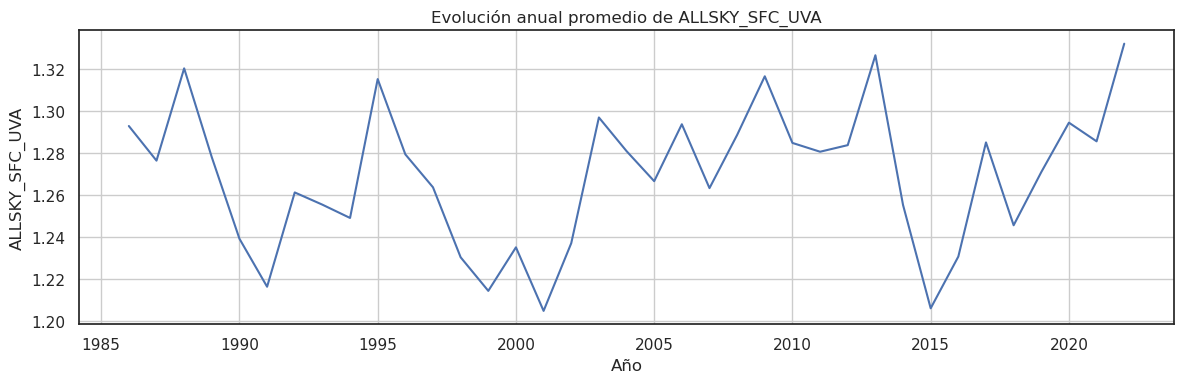

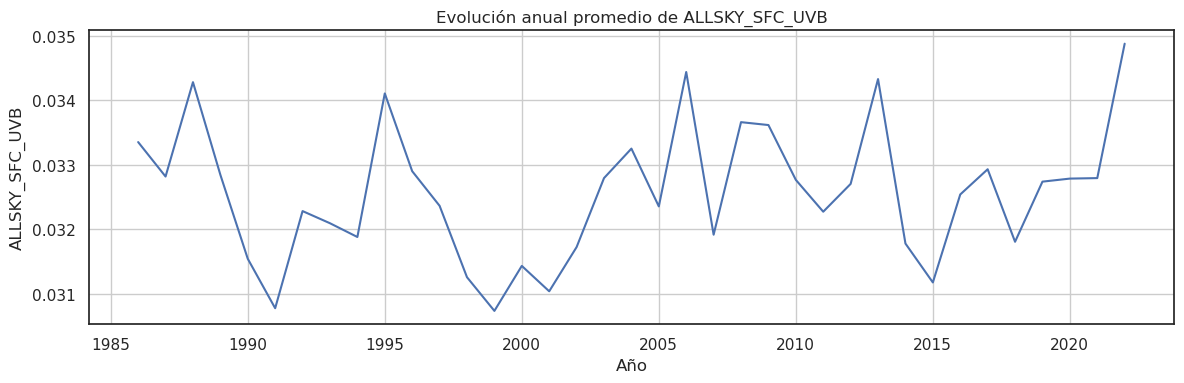

In [361]:

variables = ['ALLSKY_SFC_UV_INDEX', 'ALLSKY_SFC_SW_DWN', 'ALLSKY_SFC_UVA', 'ALLSKY_SFC_UVB']

for var in variables:
    plt.figure(figsize=(12, 4))
    sns.lineplot(data=df_power, x='YEAR', y=var, estimator='mean', errorbar=None)
    plt.title(f'Evolución anual promedio de {var}')
    plt.xlabel('Año')
    plt.ylabel(var)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


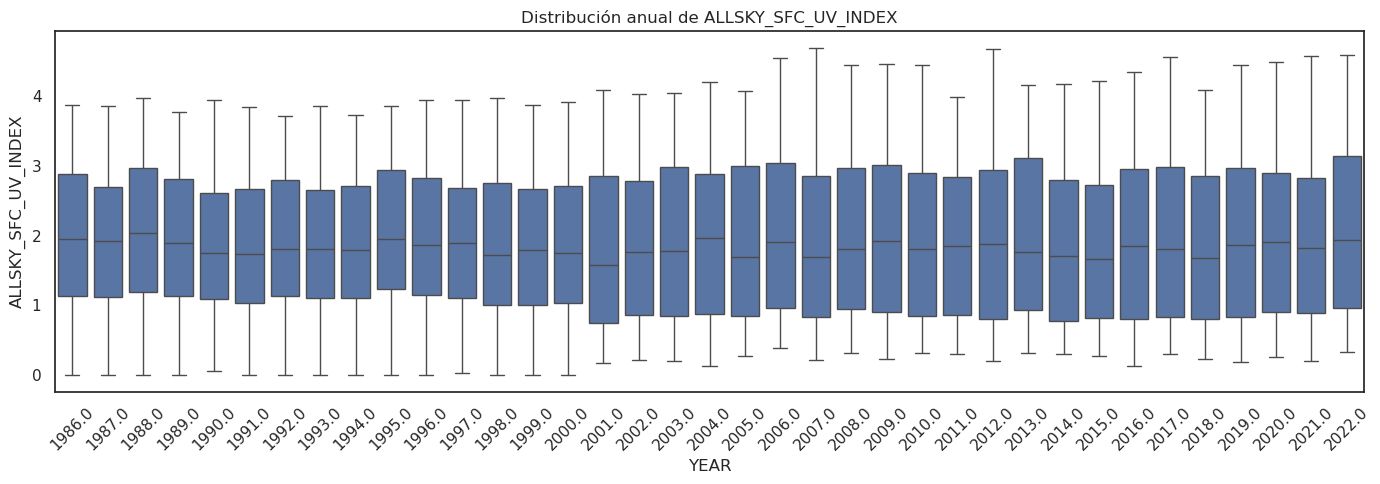

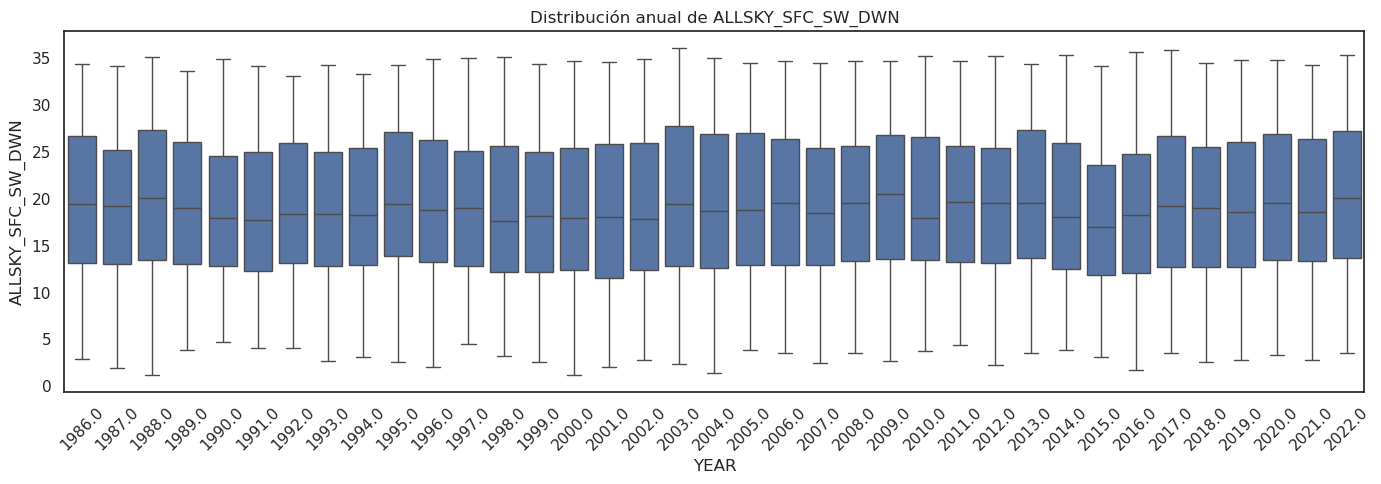

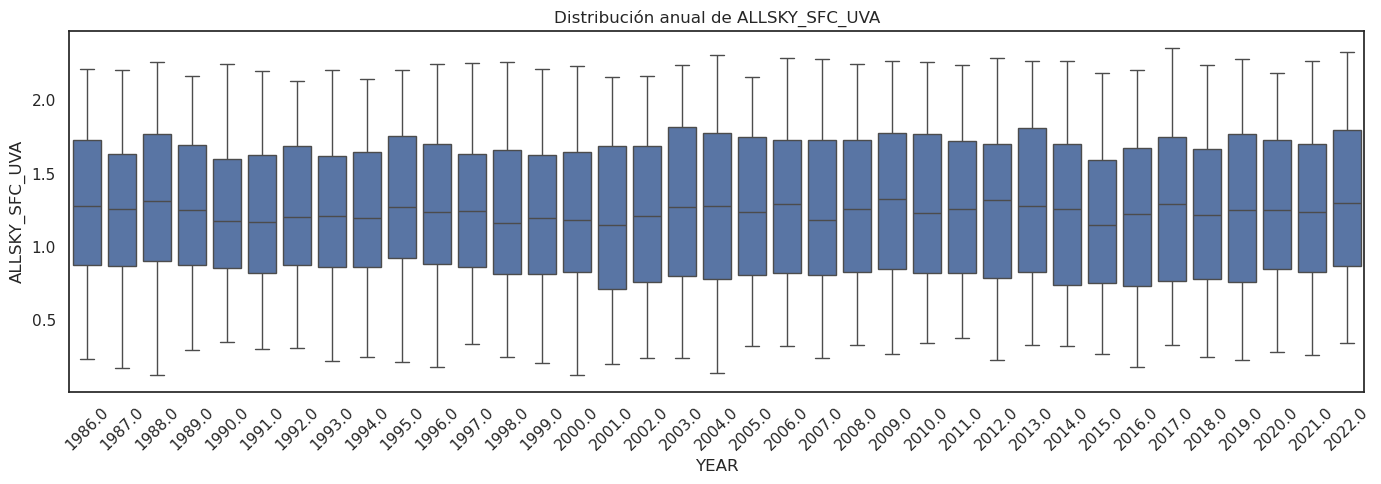

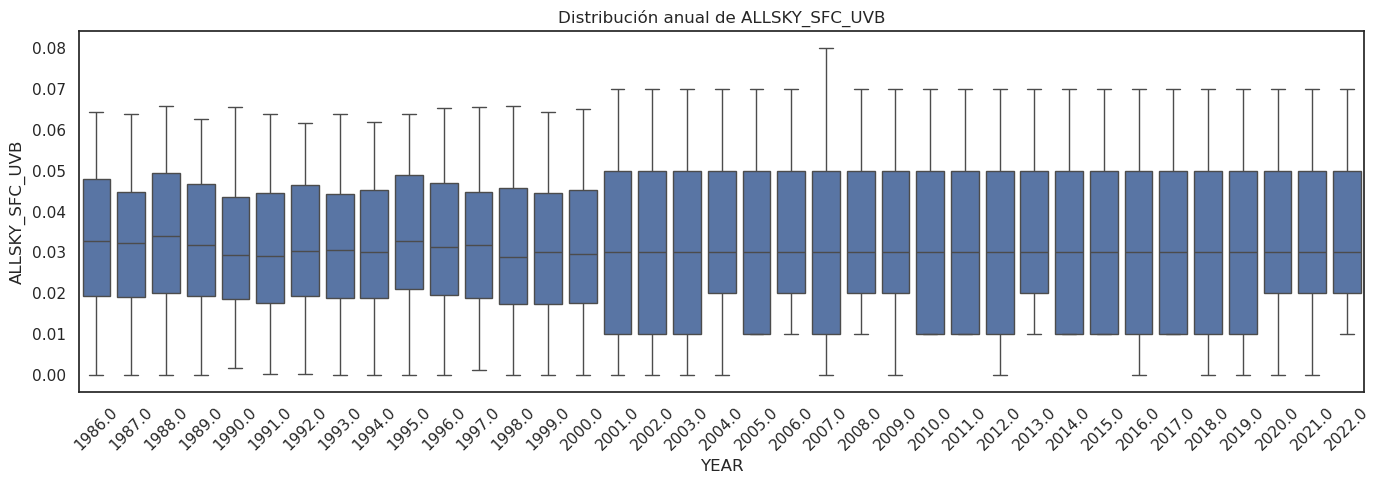

In [363]:
for var in variables:
    plt.figure(figsize=(14, 5))
    sns.boxplot(data=df_power, x='YEAR', y=var)
    plt.title(f'Distribución anual de {var}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

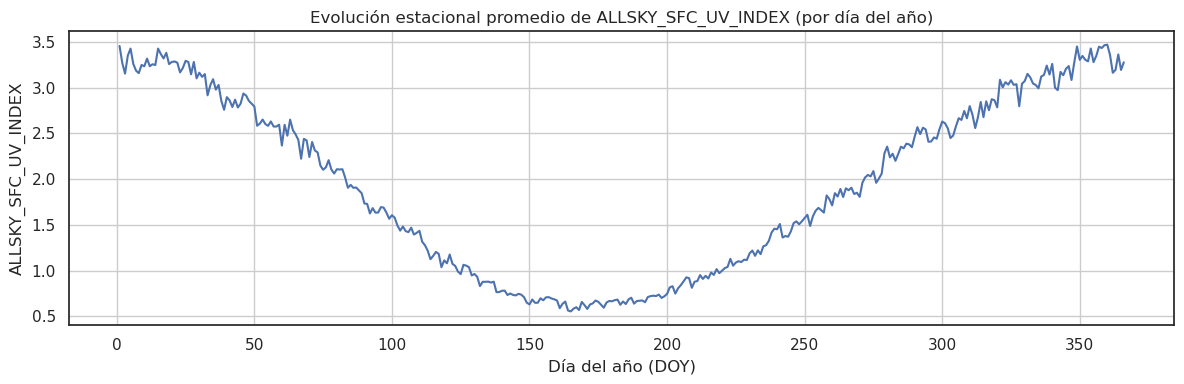

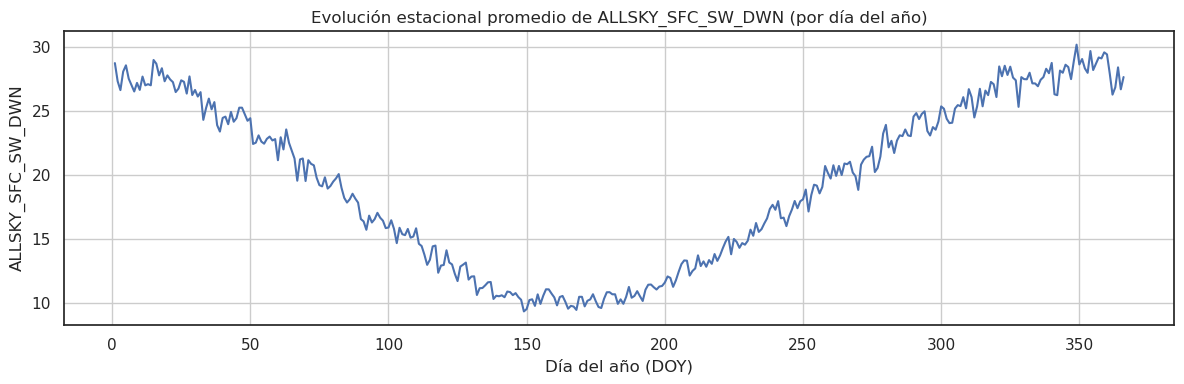

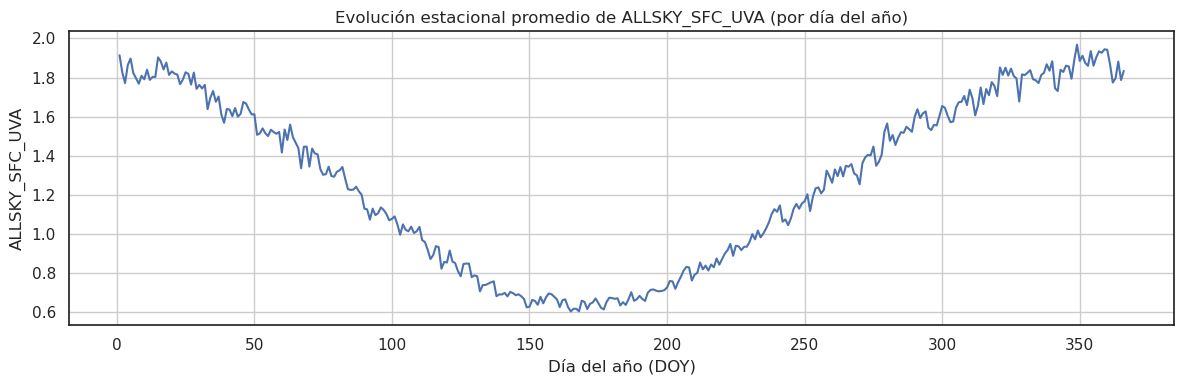

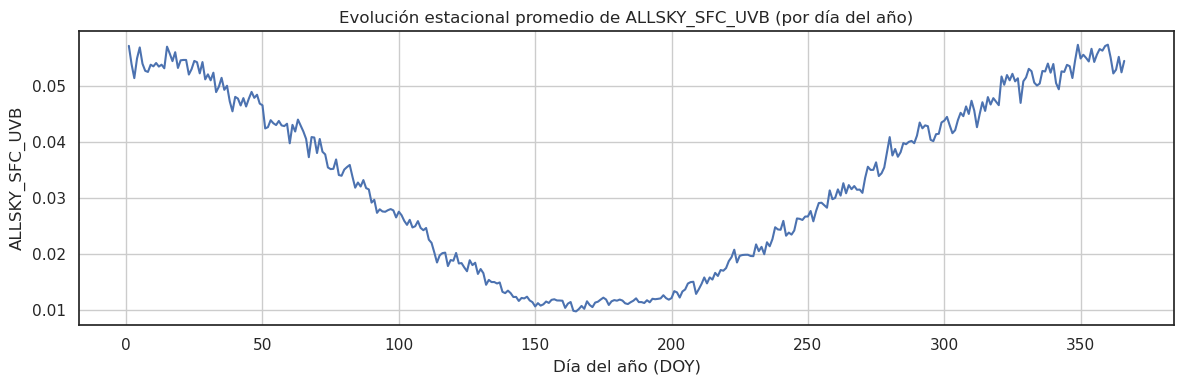

In [369]:
for var in variables:
    plt.figure(figsize=(12, 4))
    sns.lineplot(data=df_power, x='DOY', y=var, estimator='mean', errorbar=None)
    plt.title(f'Evolución estacional promedio de {var} (por día del año)')
    plt.xlabel('Día del año (DOY)')
    plt.ylabel(var)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


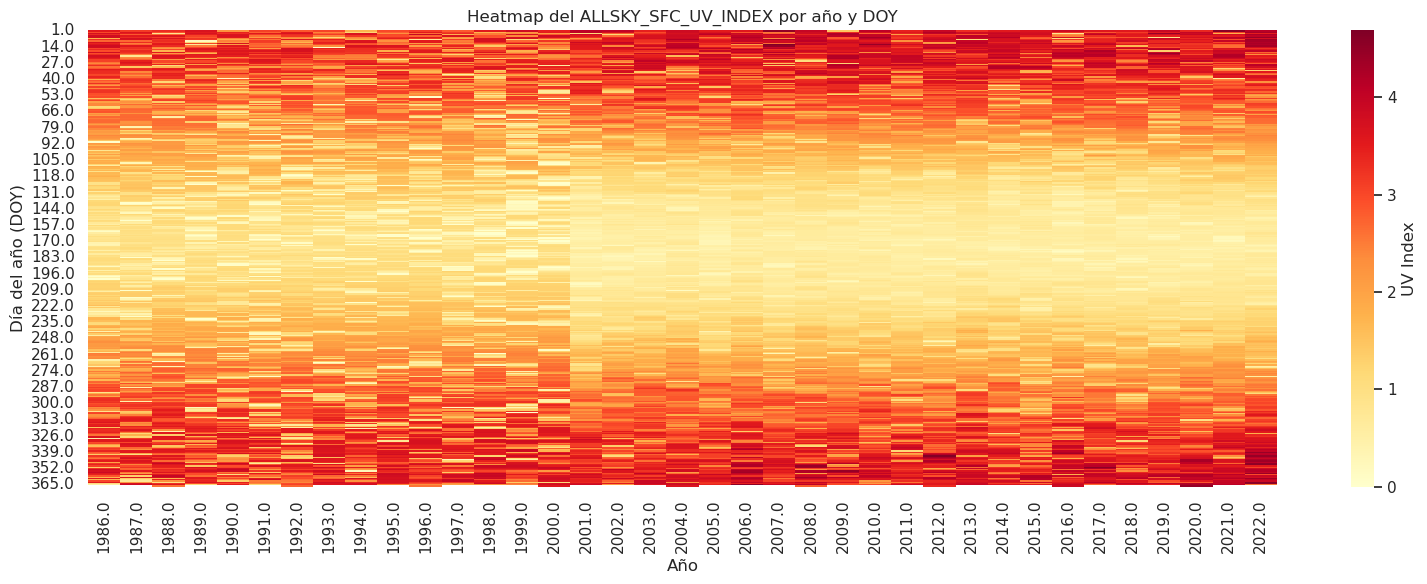

In [371]:
import numpy as np
pivot_df = df_power.pivot_table(index='DOY', columns='YEAR', values='ALLSKY_SFC_UV_INDEX')

plt.figure(figsize=(16, 6))
sns.heatmap(pivot_df, cmap='YlOrRd', cbar_kws={'label': 'UV Index'})
plt.title('Heatmap del ALLSKY_SFC_UV_INDEX por año y DOY')
plt.xlabel('Año')
plt.ylabel('Día del año (DOY)')
plt.tight_layout()
plt.show()


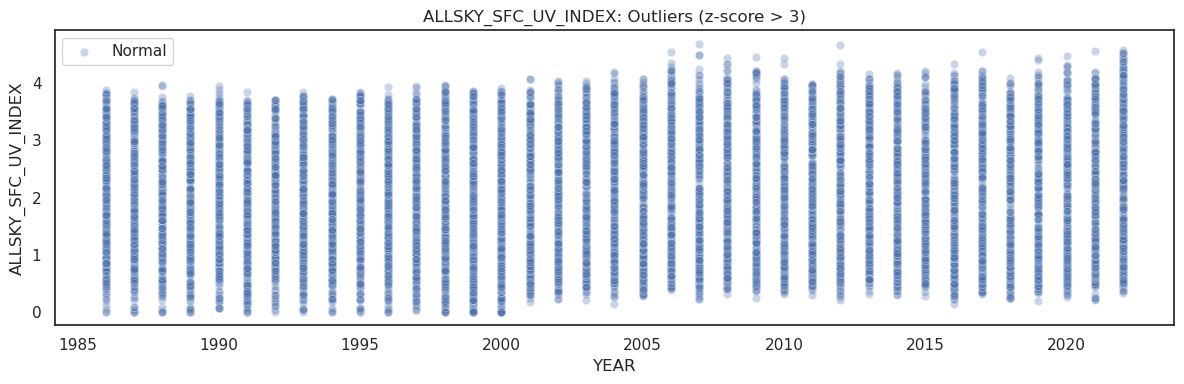

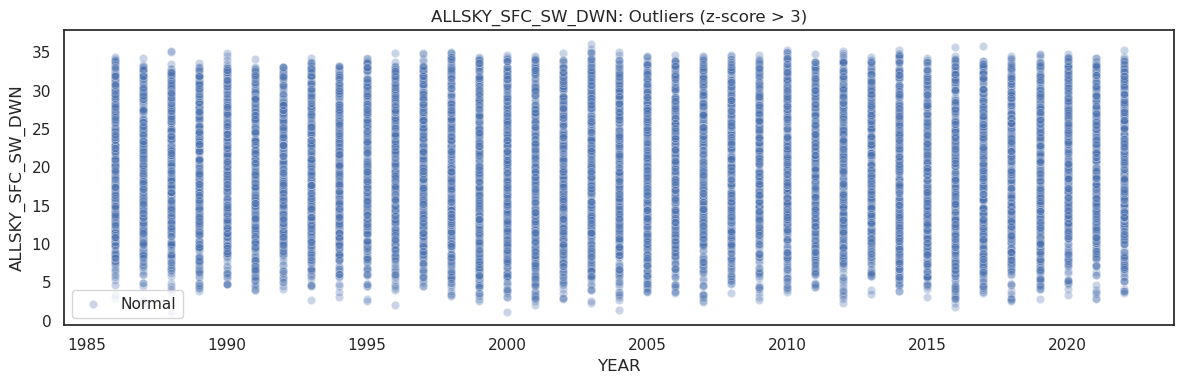

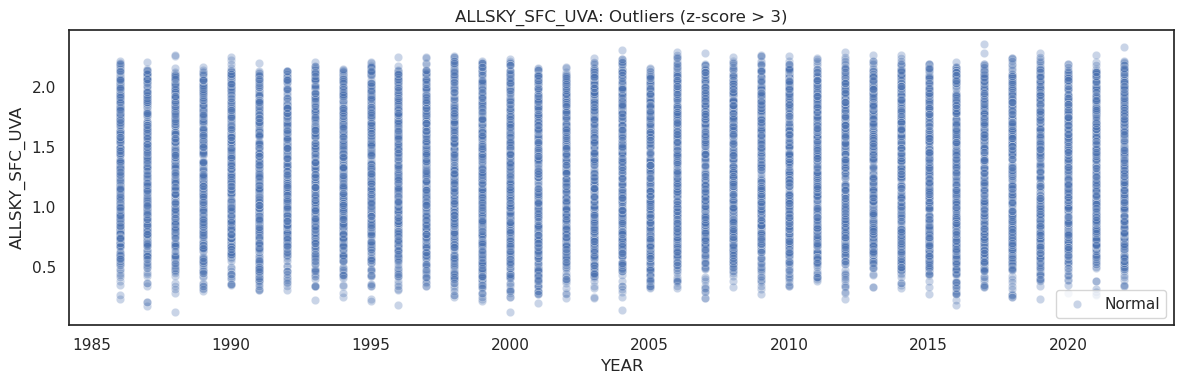

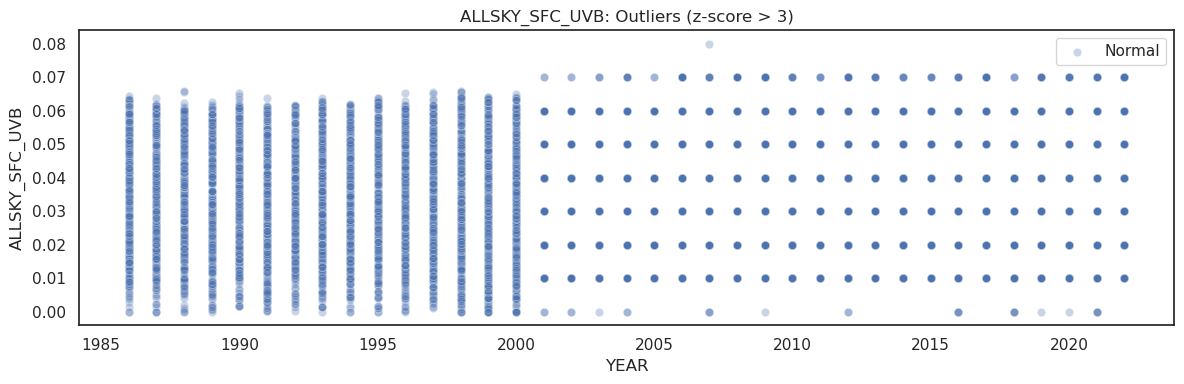

In [373]:
from scipy.stats import zscore

for var in variables:
    df_power[f'{var}_zscore'] = zscore(df_power[var])
    outliers = df_power[np.abs(df_power[f'{var}_zscore']) > 3]

    plt.figure(figsize=(12, 4))
    sns.scatterplot(data=df_power, x='YEAR', y=var, alpha=0.3, label='Normal')
    sns.scatterplot(data=outliers, x='YEAR', y=var, color='red', label='Outliers')
    plt.title(f'{var}: Outliers (z-score > 3)')
    plt.legend()
    plt.tight_layout()
    plt.show()


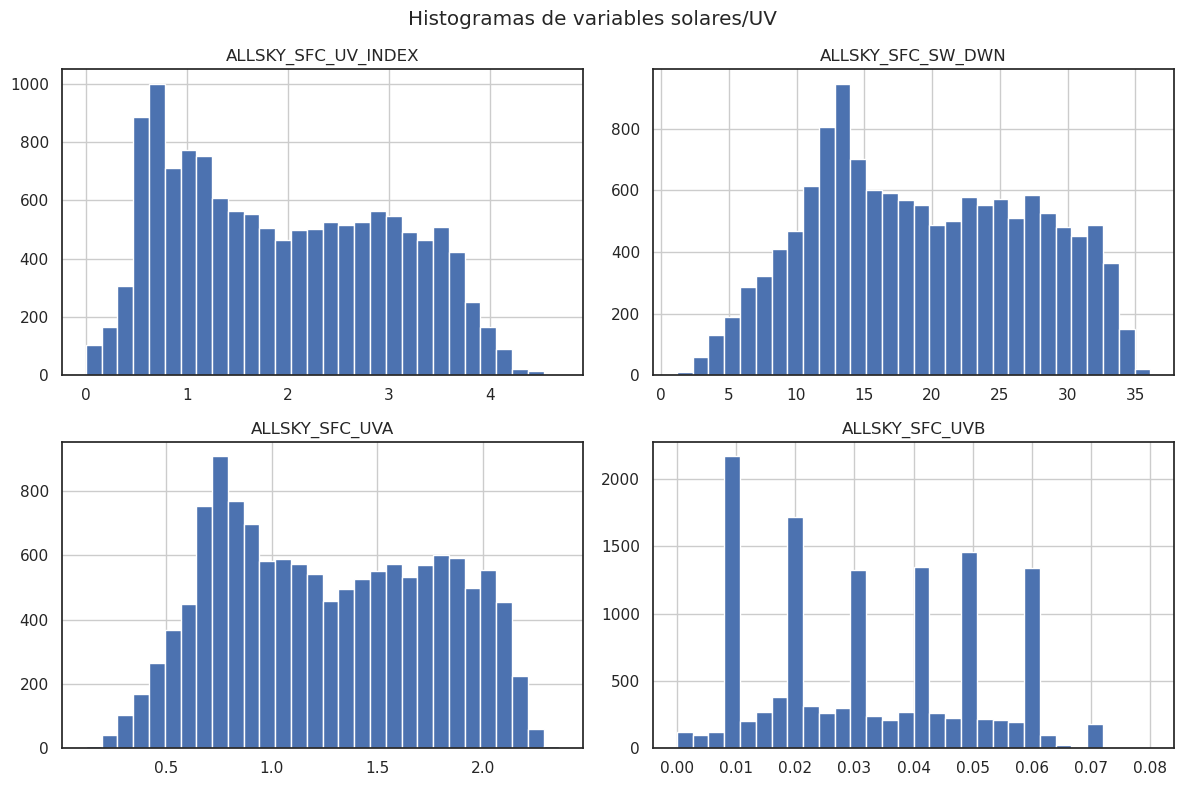

In [375]:
df_power[variables].hist(bins=30, figsize=(12, 8))
plt.suptitle('Histogramas de variables solares/UV')
plt.tight_layout()
plt.show()

In [323]:
variables = ['ALLSKY_SFC_SW_DWN','ALLSKY_SFC_UVA','ALLSKY_SFC_UVB','ALLSKY_SFC_UV_INDEX']


df_power_amplio = resumen_mensual_todas_variables(df_power,variables)

In [327]:
df_power_amplio.shape

(37, 37)

In [329]:
df_power_amplio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   YEAR                          37 non-null     float64
 1   ALLSKY_SFC_SW_DWN_mean        37 non-null     float64
 2   ALLSKY_SFC_SW_DWN_sum         37 non-null     float64
 3   ALLSKY_SFC_SW_DWN_min         37 non-null     float64
 4   ALLSKY_SFC_SW_DWN_max         37 non-null     float64
 5   ALLSKY_SFC_SW_DWN_std         37 non-null     float64
 6   ALLSKY_SFC_SW_DWN_median      37 non-null     float64
 7   ALLSKY_SFC_SW_DWN_skew        37 non-null     float64
 8   ALLSKY_SFC_SW_DWN_kurtosis    37 non-null     float64
 9   ALLSKY_SFC_SW_DWN_outliers    37 non-null     int64  
 10  ALLSKY_SFC_UVA_mean           37 non-null     float64
 11  ALLSKY_SFC_UVA_sum            37 non-null     float64
 12  ALLSKY_SFC_UVA_min            37 non-null     float64
 13  ALLSKY_

In [345]:
outlier_cols = [col for col in df_power_amplio.columns if '_outliers' in col ]
df_power_amplio[outlier_cols].sum()

ALLSKY_SFC_SW_DWN_outliers      0.0
ALLSKY_SFC_UVA_outliers         0.0
ALLSKY_SFC_UVB_outliers         0.0
ALLSKY_SFC_UV_INDEX_outliers    0.0
total_outliers_anual            0.0
dtype: float64

In [347]:
df_power_amplio = df_power_amplio.drop(columns=outlier_cols,index=1)

In [349]:
df_power_amplio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 0 to 36
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   YEAR                          36 non-null     float64
 1   ALLSKY_SFC_SW_DWN_mean        36 non-null     float64
 2   ALLSKY_SFC_SW_DWN_sum         36 non-null     float64
 3   ALLSKY_SFC_SW_DWN_min         36 non-null     float64
 4   ALLSKY_SFC_SW_DWN_max         36 non-null     float64
 5   ALLSKY_SFC_SW_DWN_std         36 non-null     float64
 6   ALLSKY_SFC_SW_DWN_median      36 non-null     float64
 7   ALLSKY_SFC_SW_DWN_skew        36 non-null     float64
 8   ALLSKY_SFC_SW_DWN_kurtosis    36 non-null     float64
 9   ALLSKY_SFC_UVA_mean           36 non-null     float64
 10  ALLSKY_SFC_UVA_sum            36 non-null     float64
 11  ALLSKY_SFC_UVA_min            36 non-null     float64
 12  ALLSKY_SFC_UVA_max            36 non-null     float64
 13  ALLSKY_SFC_U

In [379]:
df_power_amplio.to_csv(destino_archivos+'radiacion_solar_resumen.csv')

In [353]:
df_power_amplio

,YEAR,ALLSKY_SFC_SW_DWN_mean,ALLSKY_SFC_SW_DWN_sum,ALLSKY_SFC_SW_DWN_min,ALLSKY_SFC_SW_DWN_max,ALLSKY_SFC_SW_DWN_std,ALLSKY_SFC_SW_DWN_median,ALLSKY_SFC_SW_DWN_skew,ALLSKY_SFC_SW_DWN_kurtosis,ALLSKY_SFC_UVA_mean,...,ALLSKY_SFC_UVB_skew,ALLSKY_SFC_UVB_kurtosis,ALLSKY_SFC_UV_INDEX_mean,ALLSKY_SFC_UV_INDEX_sum,ALLSKY_SFC_UV_INDEX_min,ALLSKY_SFC_UV_INDEX_max,ALLSKY_SFC_UV_INDEX_std,ALLSKY_SFC_UV_INDEX_median,ALLSKY_SFC_UV_INDEX_skew,ALLSKY_SFC_UV_INDEX_kurtosis
0,1986.0,19.733753,7202.82,2.93,34.38,7.762549,19.480,0.090643,-1.131278,1.292778,...,0.096529,-1.143065,1.988465,725.789591,0.000000,3.872894,0.997526,1.955008,0.098972,-1.147622
2,1988.0,20.169481,7382.03,1.18,35.13,7.827262,20.080,-0.003788,-1.118028,1.320246,...,0.008964,-1.148174,2.045094,748.504314,0.000000,3.969432,1.004550,2.032238,0.011722,-1.153734
3,1989.0,19.497808,7116.70,3.87,33.61,7.595098,19.040,-0.000319,-1.070741,1.277904,...,-0.000074,-1.071218,1.957474,714.478130,0.000000,3.773782,0.977265,1.898372,0.001355,-1.073924
4,1990.0,18.881808,6891.86,4.77,34.94,7.580780,17.910,0.314939,-0.962656,1.239071,...,0.314939,-0.962656,1.878010,685.473665,0.061578,3.944975,0.975777,1.752922,0.314939,-0.962656
5,1991.0,18.518959,6759.42,4.04,34.13,7.689285,17.740,0.096190,-1.038609,1.216196,...,0.096190,-1.038609,1.831490,668.493912,0.000000,3.840715,0.989397,1.731040,0.097688,-1.040816
6,1992.0,19.231667,7038.79,4.12,33.11,7.275959,18.350,0.090508,-1.124465,1.261126,...,0.090508,-1.124465,1.923103,703.855767,0.000000,3.709423,0.936416,1.809557,0.091179,-1.125771
7,1993.0,19.139233,6985.82,2.74,34.22,7.626883,18.390,0.191603,-0.992749,1.255299,...,0.196412,-1.001369,1.911692,697.767651,0.000000,3.852299,0.980586,1.814706,0.197662,-1.003373
8,1994.0,19.038767,6949.15,3.13,33.27,7.469858,18.230,0.136175,-1.037045,1.248965,...,0.140196,-1.044495,1.898821,693.069679,0.000000,3.730018,0.960256,1.794111,0.142752,-1.048909
9,1995.0,20.088356,7332.25,2.63,34.22,7.725449,19.450,-0.000867,-1.014111,1.315132,...,0.008740,-1.034674,2.034411,742.560154,0.000000,3.852299,0.992032,1.951146,0.011240,-1.039560
10,1996.0,19.519426,7144.11,2.10,34.91,7.696637,18.815,0.075670,-1.060021,1.279266,...,0.083115,-1.075405,1.960949,717.707438,0.000000,3.941114,0.988857,1.869411,0.085238,-1.079207
